<a href="https://colab.research.google.com/github/yoshighosh/AI4ALL/blob/master/P4_Data_Exploration_and_Scikit_Learn_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructor's Notes (remove before making a copy for the students)

Prerequisites:

*   Python 1-3
*   Intro to ML lesson
*   Classification lesson

In this lesson, we'll be using `pandas`, `matplotlib`, and `sklearn` to explore and visualize some data and do some classification.

The music example and some explanations are taken from Dr. Angelica Lim's "Machine Learning: Features and Visualization" lesson from SFU AI4ALL.



# Data Exploration and Scikit-Learn

In this final Python lesson, we'll use everything we've learned so far and work with some real datasets. We'll also finally use the Scikit-Learn library (called `sklearn` in Python) to do some basic machine learning on some sample data.

## Some important imports

In Jupyter Notebooks, we can import the libraries we need once, and then use the libraries on all future code blocks without needing to re-import everything. 

Run the following code block:

In [0]:
%matplotlib inline
import sklearn
import pandas
import numpy as np
import matplotlib.pyplot as plt

## Get that dataset!

Before we can start to do machine learning, we need to have data to train our systems on. If you remember in the "Introduction to Machine Learning" lesson, datasets aren't always easy to come by, and many are privately collected and owned. Very often, if you want to work on a new machine learning application, you may have to figure out how to collect your own data.

However, there are many great services that have open and free datasets that you can use, like [Kaggle](https://www.kaggle.com/). For this lesson, we'll use a dataset from Kaggle that contains Spotify information on the top songs of 2017.

## Grabbing datasets from GitHub

We've actually stored the dataset in a different website, called [GitHub](https://github.com/), so that we can easily grab the data for this lesson.

Be sure to run each of the code blocks below. They're not written in Python -- they're written in a different language called Bash, which is typically used on the command line and can manipulate things like files on your computer.

You don't have to worry about what each of these code blocks does, just that they help us pull data from GitHub so that we have access to it within this Notebook. (Almost like how we need to import libraries before we can start to use them.)

In [0]:
# The following is not a Python command, but a bash command
# It looks at the files and folders in this current directory
! ls

sample_data


In [0]:
# This checks if the directory called "random-data" exists, and if so, remove it
! if [ -d "random-data" ]; then rm -r random-data; fi
! ls

sample_data


In [0]:
# This creates a new directory based on a repo from my GitHub
! git clone https://github.com/Devking/random-data.git

Cloning into 'random-data'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 4), reused 17 (delta 2), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [0]:
# This is for us to check that the directory was successfully downloaded
! ls

random-data  sample_data


# Spotify's Top Songs of 2017

Let's say that you were interested in music and wanted to create a machine learning system to suggest a new song for someone to listen to. How would we create this?

Well first, we would need to have some data on what music people like. Once we have that data, we might start to think about the different qualities of a song, so you can recommend new songs based on similar qualities from songs a person has listened to.

The Spotify Top Songs of 2017 dataset contains exactly that information, so let's see how we would start to use it.

## Working with Pandas

Before we jump into machine learning, let's practice looking at datasets and exploring them. We'll use a library called `pandas` to help us do this.

We've already imported `pandas` earlier in the Notebook, so we can use it in the following code blocks. If you did not run the first code block of this lesson, the following code will raise an error.

In [0]:
# This is the file name of the Spotify dataset
# It's a "CSV" file, which stands for "comma-separated values file"
# Really, it's just a long text file with a lot of information separated by commas
filename = "random-data/spotify.csv"

# We will use a function built into pandas to read our csv data
data = pandas.read_csv(filename)

# Finally, we'll print the data to take a look at it
print(data)

      Unnamed: 0  ...                     artist
0              0  ...                     Future
1              1  ...           Childish Gambino
2              2  ...                     Future
3              3  ...                Beach House
4              4  ...                Junior Boys
5              5  ...                      Drake
6              6  ...                      Drake
7              7  ...                      Omega
8              8  ...                Death Grips
9              9  ...                Honey Claws
10            10  ...             The Avalanches
11            11  ...         Modern Folk Üçlüsü
12            12  ...                Erkin Koray
13            13  ...                 Lil Yachty
14            14  ...                        PNL
15            15  ...            Crystal Castles
16            16  ...                  New Order
17            17  ...                 Funkadelic
18            18  ...                 Chief Keef
19            19  ..

The print-out of our data above looks... not too informative. This is mainly because there's a lot of data in our dataset that we're working with, and Jupyter Notebooks doesn't format it nicely for us when we directly print all of the data. Instead, we'll have to use some functions in `pandas` to explore the data ourselves.

By the way, if you want to see the data in this dataset as a table, you can [click here to see it displayed in GitHub](https://github.com/Devking/random-data/blob/master/spotify.csv). We'll also write some code so that we can visualize our data in table form.

There are 2017 rows in this dataset and 17 columns, where each row is a single song and (almost) each column is a **feature** of the song. In terms of dataset size, this is closer to the small side -- some datasets may have thousands or even millions of rows.

## Exploring some features

Recall that our data in datasets is described by a set of properties called features.

For song data, some features you might expect are tempo, time signature, and name.

Let's print all of the names of the songs:

In [0]:
# Notice that we didn't just say "name"
# Like with accessing values in dictionaries, the specific key value in this data set is "song_title"
print(data["song_title"])

0                                           Mask Off
1                                            Redbone
2                                       Xanny Family
3                                     Master Of None
4                                     Parallel Lines
5                                           Sneakin’
6                                        Childs Play
7                                    Gyöngyhajú lány
8                                  I've Seen Footage
9                                     Digital Animal
10              Subways - In Flagranti Extended Edit
11                        Donme Dolap - Baris K Edit
12                                           Cemalim
13                                         One Night
14                                           Oh lala
15                                              Char
16                                   World In Motion
17                         One Nation Under a Groove
18                                           B

The above code prints the song titles for all 2017 songs in our dataset. However, if we wanted to recommend a new song to someone, it probably wouldn't be enough to just recommend them based on song title. We'll want to make use of multiple features, and it may help us to visualize them to find patterns in the data.

How do we know what all of the features in our dataset are? One way is to look directly at the CSV file, because these are usually the column headers that are on the first line of the file. (We could also look at the column headings in GitHub since it displays all of the data in a table nicely for us.) Since we're trying to work with our Python code as much as possible, let's see how we would do it in Python:

In [0]:
filename = "random-data/spotify.csv"
raw_data = pandas.read_csv(filename)

# Get the values of the columns (the features) and print them out
features = raw_data.columns.values
print(features)

['Unnamed: 0' 'acousticness' 'danceability' 'duration_ms' 'energy'
 'instrumentalness' 'key' 'liveness' 'loudness' 'mode' 'speechiness'
 'tempo' 'time_signature' 'valence' 'target' 'song_title' 'artist']


We see from the printout different features of our songs, such as tempo, acoustiness (how many acoustic sounds, like an acoustic guitar, are in a song), title, and artist. The first column is actually used to index the songs (so we can refer to them by number), and that's why the column title shows as "Unnamed: 0". This particular column is not a feature of our data.

For now, let's work with just a small amount of our dataset -- four features (tempo, acousticness, song title, and artist) and 20 songs.

In [0]:
filename = "random-data/spotify.csv"
raw_data = pandas.read_csv(filename)

# In pandas, we put our data into data frames so that we can manipulate them
# This takes two parameters: raw_data specifies that we're using the music data from above
# columns specifies what columns of that data we want to keep
data = pandas.DataFrame(raw_data, columns=['tempo', 'acousticness', 'song_title', 'artist'])

# Remember slicing? We use that to take just the first 20 songs in our dataset
data = data[:20]

# This will display our data in a nice table
# Typically we need to use print(), but our variable 'data' is a pandas DataFrame which has special display properties
data

,tempo,acousticness,song_title,artist
0,150.062,0.01020,Mask Off,Future
1,160.083,0.19900,Redbone,Childish Gambino
2,75.044,0.03440,Xanny Family,Future
3,86.468,0.60400,Master Of None,Beach House
4,174.004,0.18000,Parallel Lines,Junior Boys
5,85.023,0.00479,Sneakin’,Drake
6,80.030,0.01450,Childs Play,Drake
7,144.154,0.02020,Gyöngyhajú lány,Omega
8,130.035,0.04810,I've Seen Footage,Death Grips
9,99.994,0.00208,Digital Animal,Honey Claws


There! Now we have something that's much more manageable.

## Comparing features of songs

Say we know someone likes the song "Mask Off" by Future, and we want to recommend them another song based off of similarity to "Mask Off".

Perhaps we think that the tempo (or speed) of the song might be helpful, so we'll look for songs that are similar in tempo to "Mask Off" (which is tempo = 150.062 beats per minute).

In [0]:
# Let's keep track of the Mask Off tempo
mask_off_tempo = 150.062

# Let's create a new column in our dataset
# The value of this column is the difference in tempo from that song and the tempo of "Mask Off"
# The function abs() takes the absolute value, because we just need to know the difference in tempo,
# but not if that tempo is faster or slower than "Mask Off"
data['tempo_difference'] = abs(mask_off_tempo - data.tempo)
data

,tempo,acousticness,song_title,artist,tempo_difference
0,150.062,0.01020,Mask Off,Future,0.000
1,160.083,0.19900,Redbone,Childish Gambino,10.021
2,75.044,0.03440,Xanny Family,Future,75.018
3,86.468,0.60400,Master Of None,Beach House,63.594
4,174.004,0.18000,Parallel Lines,Junior Boys,23.942
5,85.023,0.00479,Sneakin’,Drake,65.039
6,80.030,0.01450,Childs Play,Drake,70.032
7,144.154,0.02020,Gyöngyhajú lány,Omega,5.908
8,130.035,0.04810,I've Seen Footage,Death Grips,20.027
9,99.994,0.00208,Digital Animal,Honey Claws,50.068


### Visualizing the tempo difference

We can look at the column `tempo_difference` in our table above to see which songs have similar tempos to "Mask Off". Another way to present this information is to visualize it in a graph:

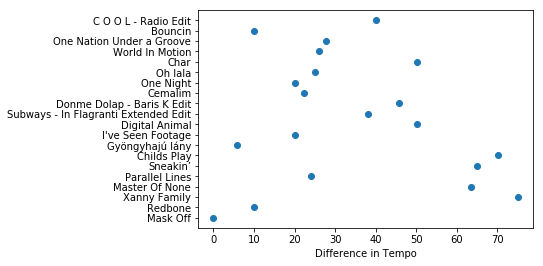

In [0]:
# Remember that we've imported matplotlib.pyplot as plt at the start of the Notebook
# Here we will use pyplot to do our visualization

plt.scatter(data['tempo_difference'], data['song_title'])
plt.xlabel('Difference in Tempo')
plt.show()

Take a moment to look at the graph and see what's going on. The y-axis of the graph is _discrete_ -- each y-value refers to a specific song. The x-axis of the graph is the tempo difference. 

Points that are closer to the left have smaller differences in tempo, whereas points that are closer to the right have larger differences in tempo.

Looking at the graph above, which song has the largest difference in tempo from "Mask Off"?

### Finding the acousticness difference

Let's do the same for acousticness, which we might think is another good measure of song similarity.

The acousticness of a song is measured from 0 to 1, with 0 being no acousticness (all electronic sounds) and 1 being all acoustic (imagine an acoustic guitar on its own). The acoustiness of "Mask Off" is 0.01020.

In [0]:
# Add new column for acoustic difference
data['acoustic_difference'] = abs(0.01020 - data.acousticness)
data

,tempo,acousticness,song_title,artist,tempo_difference,acoustic_difference
0,150.062,0.01020,Mask Off,Future,0.000,0.00000
1,160.083,0.19900,Redbone,Childish Gambino,10.021,0.18880
2,75.044,0.03440,Xanny Family,Future,75.018,0.02420
3,86.468,0.60400,Master Of None,Beach House,63.594,0.59380
4,174.004,0.18000,Parallel Lines,Junior Boys,23.942,0.16980
5,85.023,0.00479,Sneakin’,Drake,65.039,0.00541
6,80.030,0.01450,Childs Play,Drake,70.032,0.00430
7,144.154,0.02020,Gyöngyhajú lány,Omega,5.908,0.01000
8,130.035,0.04810,I've Seen Footage,Death Grips,20.027,0.03790
9,99.994,0.00208,Digital Animal,Honey Claws,50.068,0.00812


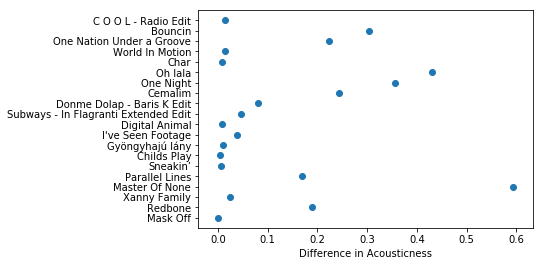

In [0]:
# Visualize it

plt.scatter(data['acoustic_difference'], data['song_title'])
plt.xlabel('Difference in Acousticness')
plt.show()

What song is most different in acousticness to "Mask Off"?

## Recommendation based on similarity

Now we want to recommend a song based on its similarity to "Mask Off", in terms of both tempo and acousticness. Looking at the two graphs above, which song might you say is closest to "Mask Off" for both features?

Take a moment to look at both graphs and try to decide!



---

One possible recommendation is the song "Gyöngyhajú lány", which is similar in both tempo and acousticness. Let's listen to a bit of the two songs to see if we think that's accurate:

> Future - Mask Off (Clean): https://www.youtube.com/watch?v=5G2SjYMy7gk

> Omega - Gyöngyhajú lány: https://www.youtube.com/watch?v=CGt-rTDkMcM&feature=youtu.be

Though they sound very different from one another, you can indeed say that the features like tempo are similar. However, upon listening to the songs themselves, you might come to the conclusion that they don't _really_ sound similar. Perhaps other features of songs, like genre, may be better features to recommend off of. It's an open question! 

Part of the work when developing a recommendation system like this is to see which features give better recommendations, and to select what the best features might be. We might know that "Mask Off" and "Gyöngyhajú lány" are similar songs in terms of tempo and acoustiness, but this might not mean that they're similar with regards to other features.

### Quantifying similarity with multiple features

Before we move on to using Scikit-Learn, let's try to quantify the similarity between songs using both tempo and acousticness together. Previously, we had calculated the tempo difference and the acousticness difference separately, and can compare songs based on one feature or the other. 

When we tried to find the most similar song using both features, we mainly approached it by visually inspecting the two graphs.

But how can we calculate similarity with respect to both features, in a quantifiable way?

First, let's see if we can visualize our 20 songs on the same graph, with both tempo and acoustiness features represented:

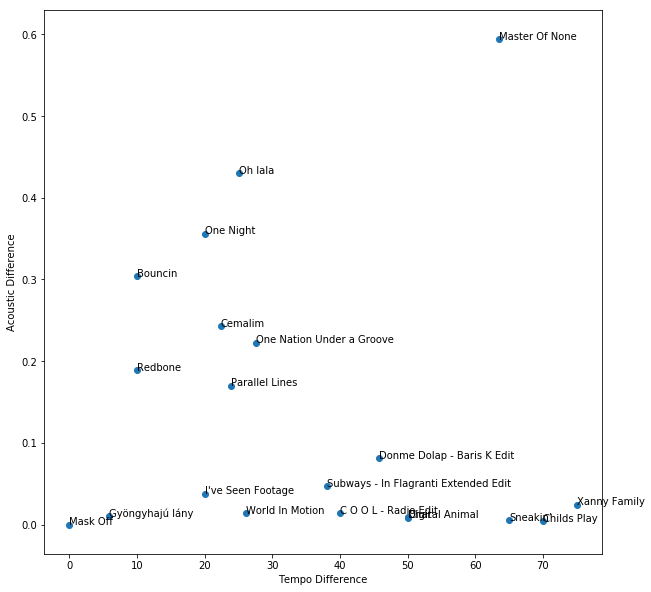

In [0]:
# The x-axis is tempo
# The y-axis is acousticness
plt.scatter(data['tempo_difference'], data['acoustic_difference'])
plt.xlabel('Tempo Difference')
plt.ylabel('Acoustic Difference')

# Set the figure size of the plot so it's not too small to read
plt.rcParams["figure.figsize"] = 10,10

# This loop goes through each point on the graph and labels it with the song title
for index, row in data.iterrows():
    plt.annotate(row['song_title'], xy=(row['tempo_difference'], row['acoustic_difference']))

From this visualization, where we look at both features at once, it's a lot clearer that "Gyöngyhajú lány" is very similar to "Mask Off" in terms of both acousticness and tempo difference, whereas "Master of None" is very different.

Interesting aside: While "Mask Off" was released in the year 2017, "Master of None" was released in 2007, but happened to regain popularity in 2017. This is likely because of its use in the Netflix show, "Master of None". While a data scientist may look at data in terms of the numbers, a social scientist (like a sociologist or cultural anthropologist) can give context to the data that we're looking at. When creating applications for the real world, we need this sort of context, and it may help us understand how to make better software like recommendation systems. For example, a music expert might be able to provide context that similarity in genre is a better feature to use for recommending a song, rather than similarity in tempo. Working across disciplines and bringing in perspectives from the arts and humanities helps us create better computer programs!



---

On the visualization above, we might realize that we can quantify 'similarity' as the distance between two points. The shorter the distance from "Mask Off", the more similar the song represented by that point is. We can make use of this intuition to numerically compute similarity across both features.

How do we compute distance again? We use the distance formula!

$$ distance = \sqrt{(y_2 - y_1)^{2} + (x_2 - x_1)^{2}} $$

In words, we take the squared difference of both features, add them, and then take the square root.

Let's say $ (x_2, y_2) $ is our point representing "Mask Off", which is at $(0,0)$. To find the distance to the point representing "Gyöngyhajú lány", we substitute for $x_1$ and $y_1$ the values of "Gyöngyhajú lány", which are 5.908 and 0.01000.

Written out:

$$ distance = \sqrt{(0.01 - 0)^{2} + (5.908 - 0)^{2}} $$
$$ distance = 5.908 $$ 

We can write this out in code and create a new column based on "distance" from "Mask Off":

In [0]:
mask_off_tempo = 150.062
mask_off_acousticness = 0.0102
data["distance"] = np.sqrt((data.acousticness - mask_off_acousticness) ** 2 + (data.tempo - mask_off_tempo) ** 2)

# Let's sort the dataset in terms of distance
sorted_dataset_distance = data.sort_values('distance')

sorted_dataset_distance

,tempo,acousticness,song_title,artist,tempo_difference,acoustic_difference,distance
0,150.062,0.01020,Mask Off,Future,0.000,0.00000,0.000000
7,144.154,0.02020,Gyöngyhajú lány,Omega,5.908,0.01000,5.908008
18,140.061,0.31400,Bouncin,Chief Keef,10.001,0.30380,10.005613
1,160.083,0.19900,Redbone,Childish Gambino,10.021,0.18880,10.022778
8,130.035,0.04810,I've Seen Footage,Death Grips,20.027,0.03790,20.027036
13,130.007,0.36600,One Night,Lil Yachty,20.055,0.35580,20.058156
12,127.681,0.25300,Cemalim,Erkin Koray,22.381,0.24280,22.382317
4,174.004,0.18000,Parallel Lines,Junior Boys,23.942,0.16980,23.942602
14,125.011,0.44000,Oh lala,PNL,25.051,0.42980,25.054687
16,123.922,0.02390,World In Motion,New Order,26.140,0.01370,26.140004


Now we have a column that tells us numerically which song is closest to "Mask Off" in terms of both tempo and acousticness!

### Normalizing our data

But wait a minute... if we take a close look at the `tempo_difference` and `distance` columns, we will notice that the two are very similar. This makes sense, because while tempo values range anywhere from 0 to 161 in our dataset, acousticness only goes from 0 to 1. The `tempo_difference` completely overshadows the `acoustic_difference` when we calculate `distance`.

In data science and machine learning, it's very common for different features to work on completely different scales. This means that we cannot compare two features directly against one another, without first **normalizing** the data to the same scale across all features. Typically, normalizing our data means scaling the values of our features to a range between 0 and 1.

We won't cover normalizing in this lesson, but it's good to be aware that this is a typical process that we perform on our data before using it to train a machine learning system.

# Scikit-Learn



Finally, we get to the library of the hour: scikit-learn.

Scikit-learn is a powerful library because it allows us to easily apply all of the machine learning concepts that we've learned to real datasets with just a few lines of code.

## The Iris Dataset

Before we get started with using scikit-learn, we need to decide what machine learning task we want to accomplish with it. 

In this lesson, we'll use scikit-learn for Classification using the **Decision Tree** algorithm, and we'll use a popular sample dataset often referred to as "the Iris dataset" that comes with the scikit-learn library.

There are many different species of Iris flowers ([Iris itself is a genus](https://en.wikipedia.org/wiki/Iris_(plant))). Our goal is to train a machine learning system to be able to take a new Iris flower and predict which Iris species it is.

![alt text](https://www.gardendesign.com/pictures/images/275x275Exact_34x0/site_3/iris-sibirica-ruffled-velvet-iris-purple-flower-beardless-siberian-iris-alamy-stock-photo_12591.jpg)

This dataset has:

* 150 examples
* 3 classes: setosa, versicolor, and virginica
* 4 features: sepal length, sepal width, petal length, petal width
* 50 examples for each class

Let's load this dataset using scikit-learn, which is called `sklearn` in Python.

In [0]:
from sklearn.datasets import load_iris

# Load the dataset, which contains the examples and their labels
iris_dataset = load_iris()

print(iris_dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

Like with our music data, printing out all of the dataset at once isn't the most approachable or presentable. We can manipulate this data to visualize it with a library like `pandas` with `matplotlib` like we did in the music example, but for now, we'll just work directly with this data.

Notice that included in our dataset is an array of 150 lists, called the "data" array. Each list here represents a flower example and has 4 values. These correspond to the 4 features of each flower (sepal length, sepal width, petal length, petal width).

Additionally, for each example, there is a correct flower classification (as either setosa, versicolor, or virginica). If you scroll to the bottom of the printout, you will see this reflected in the "target" array.

## Splitting up the training and test sets

Remember that in classification, which is a type of supervised machine learning, we must use a training set to teach our model how to correctly classify future examples. We also use a test set to test how good our model is.

The first step that we'll do is break up the Iris dataset into training set and test set:

In [0]:
from sklearn.model_selection import train_test_split

# Break the dataset up into the examples (X) and their labels (y)
X, y = iris_dataset.data, iris_dataset.target

# Split up the X and y datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

# Let's use pandas to visualize 10% of our training set
df = pd.DataFrame(
    data=np.c_[X,y], 
    columns=iris_dataset['feature_names'] + ['target'])
df.sample(frac=0.1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
19,5.1,3.8,1.5,0.3,0.0
45,4.8,3.0,1.4,0.3,0.0
86,6.7,3.1,4.7,1.5,1.0
99,5.7,2.8,4.1,1.3,1.0
89,5.5,2.5,4.0,1.3,1.0
106,4.9,2.5,4.5,1.7,2.0
4,5.0,3.6,1.4,0.2,0.0
50,7.0,3.2,4.7,1.4,1.0
121,5.6,2.8,4.9,2.0,2.0
49,5.0,3.3,1.4,0.2,0.0


Our training set contains all of the correct targets (classes) for our flower examples, along with the four features of each flower. We'll need all of this information to teach our classifier how to predict a class given a new set of four features.

**Note: Because we randomly split the examples of the dataset into a training set and test set, your output above may look different from another student's output.**

## Training our decision tree

Now that we've split our data into a training set and a test set, it's time to train our decision tree.

In [0]:
# sklearn has these classifiers built in
# We're going to import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with a max_depth of 5
classifier = DecisionTreeClassifier(max_depth=5)

# Fit the classifier to the training set
# This is the training process!! sklearn makes it super easy for us
classifier = classifier.fit(X_train, y_train)

One of the major advantages with using a Decision Tree is that we can see visually how it makes its decisions. This **transparency** is not true for all models and is actually one of the big research questions in AI today.

For example, machine learning is often used in government agencies today. If a model makes a decision that can affect whether someone gets health care or a loan, they should be able to ask *why* the system made the decision that it did.

Let's visualize the decision tree below:

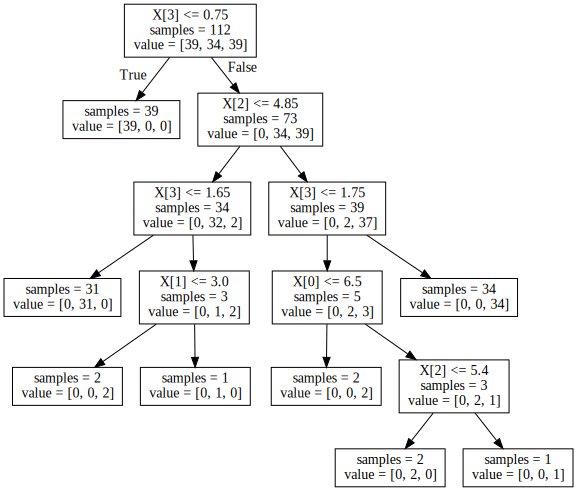

In [0]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(classifier, out_file=None, impurity=False) 
graph = graphviz.Source(dot_data) 
graph

_Again, because we split the dataset randomly, this means that your decision tree may look different from another student's decision tree._

Here's an example of what the top of the decision tree visualization may look like:

![alt text](https://i.imgur.com/SFktGyk.png)

It takes some practice to read the visualization of the decision tree, but it's actually quite informative. The root node of the decision tree starts with the line `X[3] <= 0.75`. This is the condition that splits the tree. In this case, it's saying that we should look at the feature with index 3 (petal width) and see if it's less than or equal to 0.75. If this is true, we will follow the tree to the left child. If this is false, we will follow the tree to the right child.

The `samples = 112` line means that at this node, we still have 112 samples to look at.

The `[39, 34, 39]` line tells us that of these 112 samples, 39 are the zeroth class (setosa), 34 are the first class (versicolor), and 39 are the second class (virginica).

After the first split, we'll see that we did really well! All 39 samples of setosa are correctly classified in the left child of the root.

We can follow the visualization for the rest of the decision tree to see what feature it splits on at each node.

## Testing our decision tree

We've trained our decision tree and visualized it, but we have not yet tested it to see how well it does. This is where the test set comes in -- the test set is a set of correctly labelled examples that we have withheld from the decision tree, so we can test to see if the predictions made by the decision tree match the correct labels.

With `sklearn`, it's really easy to generate our predicted labels for the test set:

In [0]:
# Create a list of predicted classes for each of the examples in the test set
y_predict = classifier.predict(X_test)

print(y_predict)

[1 2 0 1 2 0 2 1 0 0 2 1 2 0 2 2 2 1 2 0 2 2 0 2 1 0 1 1 1 1 0 0 1 1 1 0 1
 2]


In order to find the accuracy of our classifier on the test set, we use the function `score()`, which takes two parameters: (1) the data of the test set, and (2) the correct labels of the test set.

It will automatically compare our predicted label with the correct label to compute the accuracy.

In [0]:
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.9473684210526315


And we're done! In a few lines of code, we've actually:

*  Loaded our dataset
*  Picked our classifier to use
* Trained our classifier on the dataset
* Tested our classifier on unseen data

If we are satisfied with the performance of our classifier on the test set, we're ready to go, to use this model on real data in the real world!

Just to show you how little code we actually have to write to train and test a classifier, here's everything in one code block:

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_dataset = load_iris()
X, y = iris_dataset.data, iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

classifier = DecisionTreeClassifier(max_depth=5)
classifier = classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9473684210526315

In these few lines of code, we turned everything we learned about with classification and decision trees in the morning lessons into code, and used it on an actual dataset!

## The Confusion Matrix

The code above told us how accurate the decision tree was, but what if we wanted some more details about which sorts of classifications we got right and wrong? That's where the confusion matrix comes in.

We'll use the familiar `matplotlib` library to accomplish this visualization, but we'll also use a library called `seaborn` to make our visualization look a bit nicer:

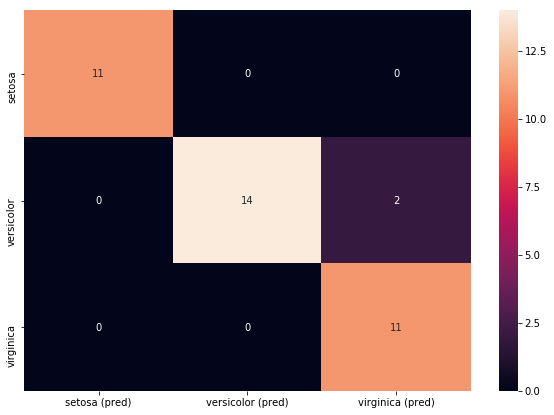

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(
    confusion_matrix, 
    index = [idx for idx in ['setosa', 'versicolor', 'virginica']],
    columns = [col for col in ['setosa (pred)', 'versicolor (pred)', 'virginica (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True)

Our confusion matrix in this case is a 3x3 table, because there are 3 different possible classes for each flower. The columns tell us what class we predicted, whereas the rows tell us what the actual class is.

*Because we randomly split the data set, your confusion matrix might look different from someone else's in the class.*

The following is an example of what the confusion matrix might look like:

![alt text](https://i.imgur.com/vsKCEKx.png)

The first row tells us that for flowers that should actually be classified as setosa, what our decision tree predicted their class should be. In the example screenshot, there were 11 setosa flowers, and they were all correctly labelled setosa.

The second row is more interesting. It tells us that there were 16 versicolor plants, but only 14 were classified correctly. The remaining two were predicted to be virginica, which was incorrect.

Finally, the last row shows that our decision tree classified all 11 virginica plants correctly.

For this particular example above, there were 38 test examples, and 36 were classified correctly, for an accuracy of 94.7%. The confusion matrix helps us visualize the performance of our decision tree and in addition to the accuracy number itself, it gives us the added information of which type of flower we tended to classify incorrectly.

# And that's all for the Python lessons!

Congrats on making it through all four Python lessons, starting all the way from the very basics and finishing with using Scikit-Learn to do machine learning. This is an accomplishment to be proud of, so be sure to pat yourself on the back!

![clapping gif](https://media.giphy.com/media/1BhG0U58TwNllcEXcd/giphy.gif)

Remember, it takes time and practice to improve in Python -- don't worry if much of this still seems new. You'll have lots of opportunities to look over these lessons and apply what you have learned to the hands-on projects. This is just the beginning of your Python (and programming) journey!